In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
!ls drive/MyDrive/extended_features/

emotion_features_extended.csv  neutral_extended_features.csv
fear_extended_features.csv     sad_extended_features.csv
happy_extended_features.csv    updated_master_features.csv


In [4]:
# Load CSV
df = pd.read_csv("drive/MyDrive/extended_features/updated_master_features.csv")


In [5]:
# Ensure subject_id is string and padded
df['subject_id'] = df['subject_id'].astype(str).str.zfill(7)

# Filter subject groups
controls = df[df['subject_id'].between('0028197', '0028225')]
masters = df[df['subject_id'].between('0028297', '0028325')]

print(f"Masters: {len(masters)} subjects")
print(f"Controls: {len(controls)} subjects")

# Drop subject_id for feature comparison
features = df.columns.drop('subject_id')

Masters: 29 subjects
Controls: 29 subjects


In [6]:
# Mean comparison
mean_diff = masters[features].mean() - controls[features].mean()

# T-test
p_values = {}
for col in features:
    _, p = ttest_ind(masters[col], controls[col], equal_var=False)
    p_values[col] = p

In [7]:
# Show top 10 significant differences
sig_results = pd.DataFrame({
    'mean_diff': mean_diff,
    'p_value': pd.Series(p_values)
}).sort_values(by='p_value').head(10)

print(sig_results)

                                                 mean_diff   p_value
rh_thickness_rh_superiorparietal_thickness        0.095897  0.000049
lh_thickness_lh_supramarginal_thickness           0.110552  0.000204
lh_thickness_lh_superiorparietal_thickness        0.089897  0.000207
lh_thickness_lh_precuneus_thickness               0.098379  0.000544
lh_thickness_lh_MeanThickness_thickness           0.066108  0.000609
lh_thickness_lh_paracentral_thickness             0.154172  0.000657
lh_thickness_lh_caudalmiddlefrontal_thickness     0.111103  0.001495
lh_thickness_lh_parstriangularis_thickness        0.109621  0.001536
aseg_volume_Right-Lateral-Ventricle           -2338.158621  0.001676
rh_meancurv_rh_inferiortemporal_meancurv         -0.005828  0.001819


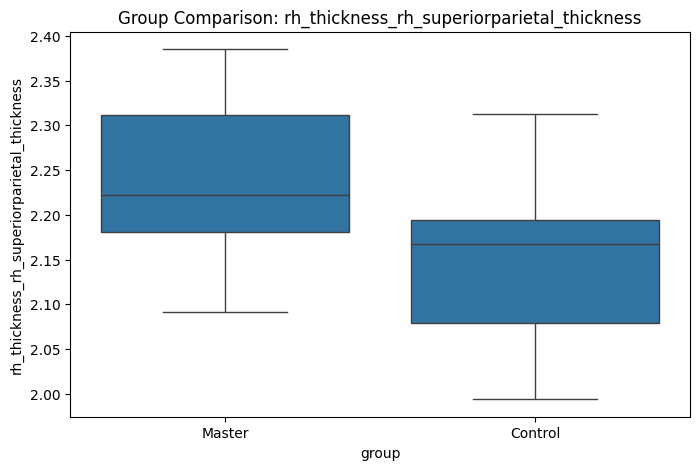

In [8]:
# Boxplot of a key feature
top_feature = sig_results.index[0]
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.concat([masters.assign(group='Master'), controls.assign(group='Control')]),
            x='group', y=top_feature)
plt.title(f'Group Comparison: {top_feature}')
plt.show()


# 📊 Feature Selection and Groupwise Mean Comparison

* **Total Gray Matter Volume** (aseg_volume_TotalGrayVol)
Total volume of gray matter across the entire brain, including cortical and subcortical regions. Important because gray
matter is responsible for processing and computation in the brain.

* **Subcortical Gray Matter Volume** (aseg_volume_SubCortGrayVol)
Volume of gray matter in subcortical structures like the thalamus and basal ganglia. Essential for memory, motor control,
and decision-making.

* **BrainSeg Volume to eTIV Ratio** (aseg_volume_BrainSegVol-to-eTIV)
Ratio of brain segmentation volume to estimated intracranial volume. Serves as a normalized brain efficiency indicator;
higher values imply better brain volume utilization.

* **Left Superior Frontal Thickness** (lh_thickness_lh_superiorfrontal_thickness)
Cortical thickness of the left superior frontal gyrus. Associated with executive control, planning, and working memory.

* **Left Precuneus Thickness** (lh_thickness_lh_precuneus_thickness)
Cortical thickness of the left precuneus. Critical for mental imagery, self-referential processing, and spatial reasoning.

* **Right Superior Frontal Thickness** (rh_thickness_rh_superiorfrontal_thickness)
Cortical thickness of the right superior frontal gyrus. Plays a role in abstract thinking and sustained attention.

* **Right Precuneus Thickness** (rh_thickness_rh_precuneus_thickness)
Cortical thickness of the right precuneus. Supports visual-spatial integration and decision-making.

* **Left Rostral Middle Frontal Volume** (lh_volume_lh_rostralmiddlefrontal_volume)
Volume of the left rostral middle frontal gyrus. Important for planning, goal-setting, and cognitive flexibility.

* **Right Rostral Middle Frontal Volume** (rh_volume_rh_rostralmiddlefrontal_volume)
Volume of the right rostral middle frontal gyrus. Contributes to strategic thinking and task management.

In [29]:
# Define relevant features for brain efficiency
features = [
    "aseg_volume_TotalGrayVol",
    "aseg_volume_SubCortGrayVol",
    "aseg_volume_BrainSegVol-to-eTIV",
    "lh_thickness_lh_superiorfrontal_thickness",
    "lh_thickness_lh_precuneus_thickness",
    "rh_thickness_rh_superiorfrontal_thickness",
    "rh_thickness_rh_precuneus_thickness",
    "lh_volume_lh_rostralmiddlefrontal_volume",
    "rh_volume_rh_rostralmiddlefrontal_volume"
]

# Calculate group means
means_df = pd.DataFrame({
    "Feature": features,
    "Masters Mean": masters[features].mean().values,
    "Controls Mean": controls[features].mean().values
})

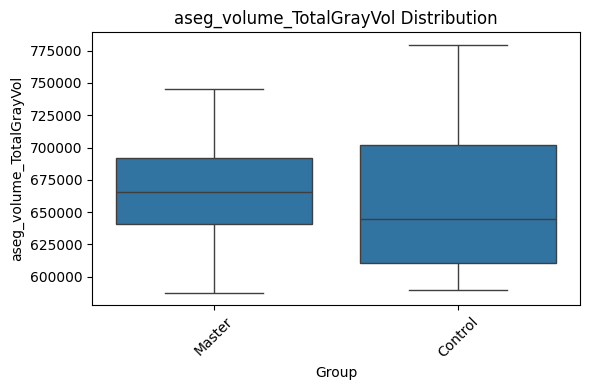

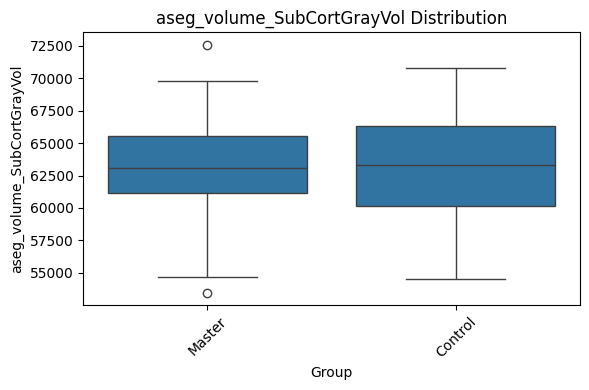

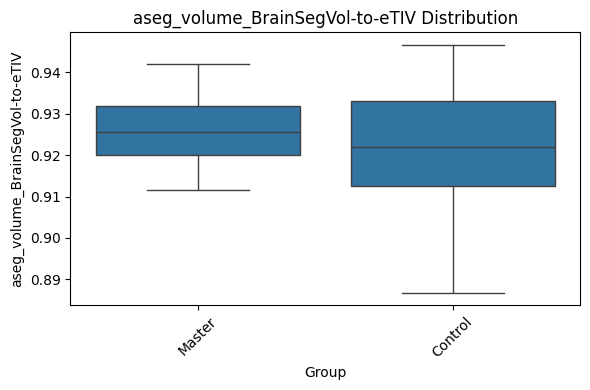

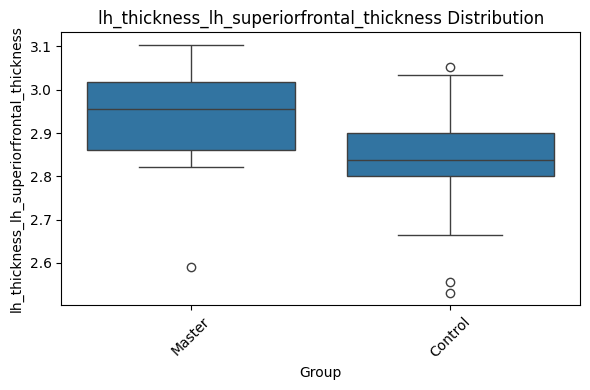

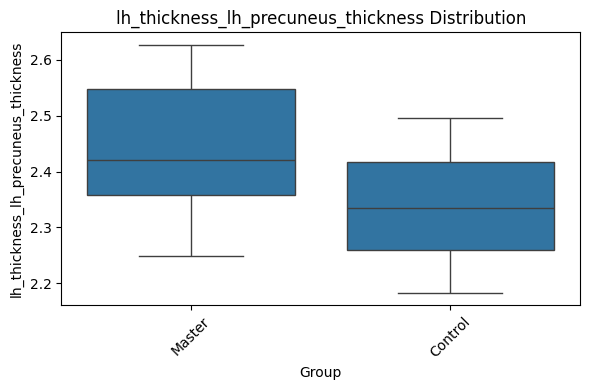

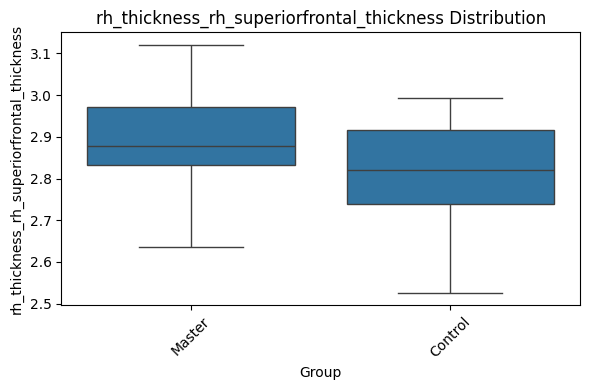

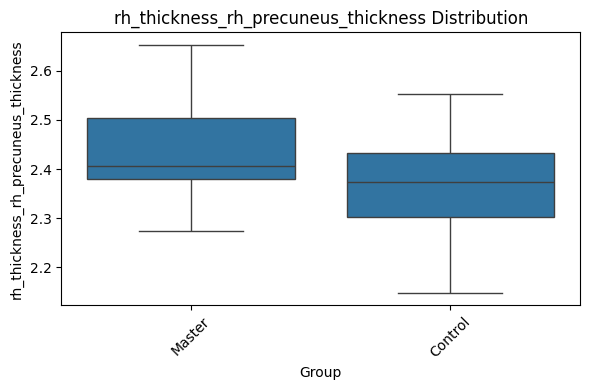

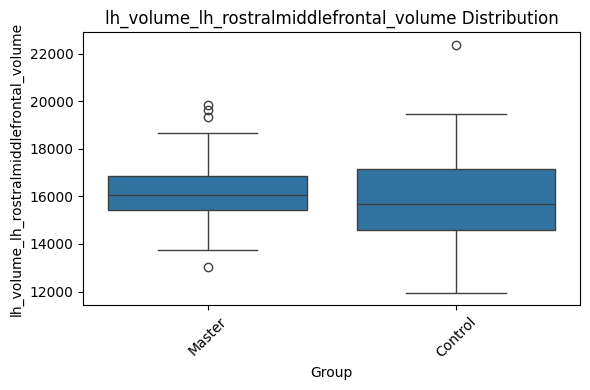

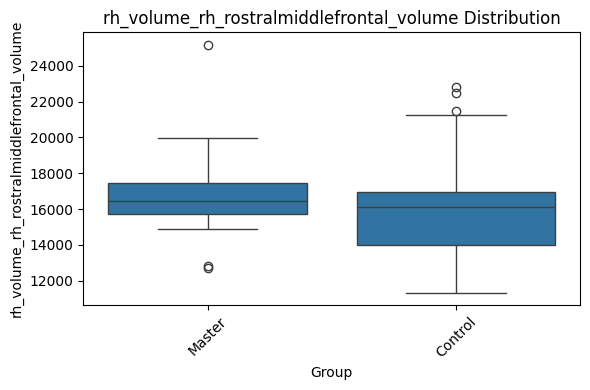

In [24]:
# Plot bar charts
for feature in features:
  plt.figure(figsize=(6, 4))
  sns.boxplot(data=pd.concat([masters.assign(Group='Master'), controls.assign(Group='Control')]),
              x='Group', y=feature)
  plt.title(f'{feature} Distribution')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# Statistical Testing (Welch's t-test)

In [25]:
# Run Welch's t-test on each feature
p_values = []
for feature in features:
    _, p = ttest_ind(masters[feature], controls[feature], equal_var=False)
    p_values.append(p)

# Add to summary
means_df["p-value"] = p_values
means_df["Significant (< 0.05)"] = means_df["p-value"] < 0.05

# Display sorted by p-value
means_df.sort_values("p-value", inplace=True)
means_df

,Feature,Masters Mean,Controls Mean,p-value,Significant (< 0.05)
2,aseg_volume_BrainSegVol-to-eTIV,0.925889,0.922295,0.000544,True
5,rh_thickness_rh_superiorfrontal_thickness,2.889517,2.813448,0.001823,True
7,lh_volume_lh_rostralmiddlefrontal_volume,16203.931034,15969.241379,0.005008,True
8,rh_volume_rh_rostralmiddlefrontal_volume,16699.655172,16350.655172,0.025262,True
6,rh_thickness_rh_precuneus_thickness,2.441586,2.366621,0.227332,False
1,aseg_volume_SubCortGrayVol,63155.413793,63112.034483,0.620433,False
0,aseg_volume_TotalGrayVol,668916.302982,663980.934816,0.665667,False
4,lh_thickness_lh_precuneus_thickness,2.435862,2.337483,0.715802,False
3,lh_thickness_lh_superiorfrontal_thickness,2.934414,2.836931,0.970298,False


## ⭐ Top Significant Features Visualization

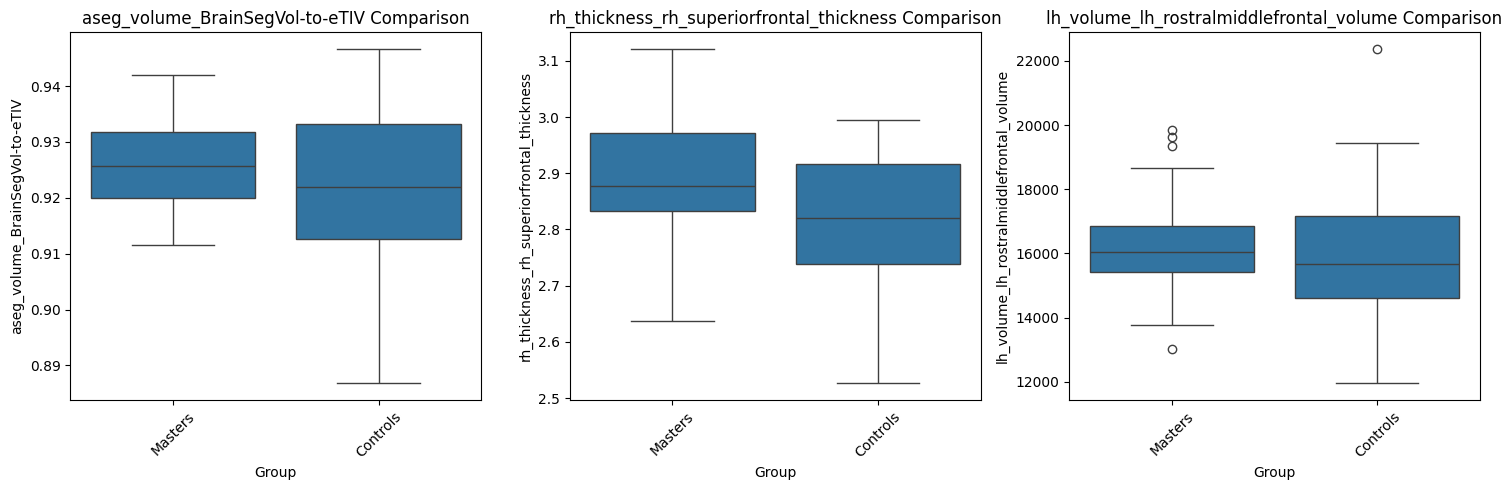

In [26]:
# Visualize top 3 significant features
top_sig = means_df[means_df["Significant (< 0.05)"]].head(3)["Feature"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_sig):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=pd.concat([masters.assign(Group='Masters'), controls.assign(Group='Controls')]),
                x='Group', y=feature)
    plt.title(f"{feature} Comparison")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

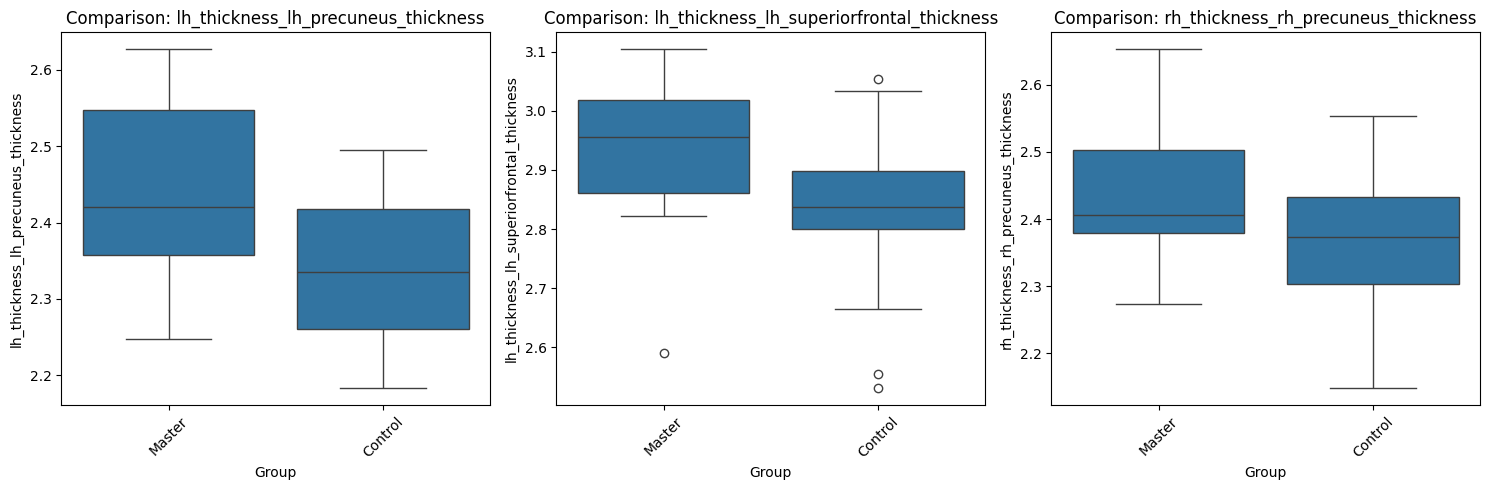

In [28]:
plt.figure(figsize=(15, 5))
top_features = ['lh_thickness_lh_precuneus_thickness', 'lh_thickness_lh_superiorfrontal_thickness', 'rh_thickness_rh_precuneus_thickness']
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=pd.concat([masters.assign(Group='Master'), controls.assign(Group='Control')]),
                x='Group', y=feature)
    plt.title(f'Comparison: {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🧠 PCA and Clustering

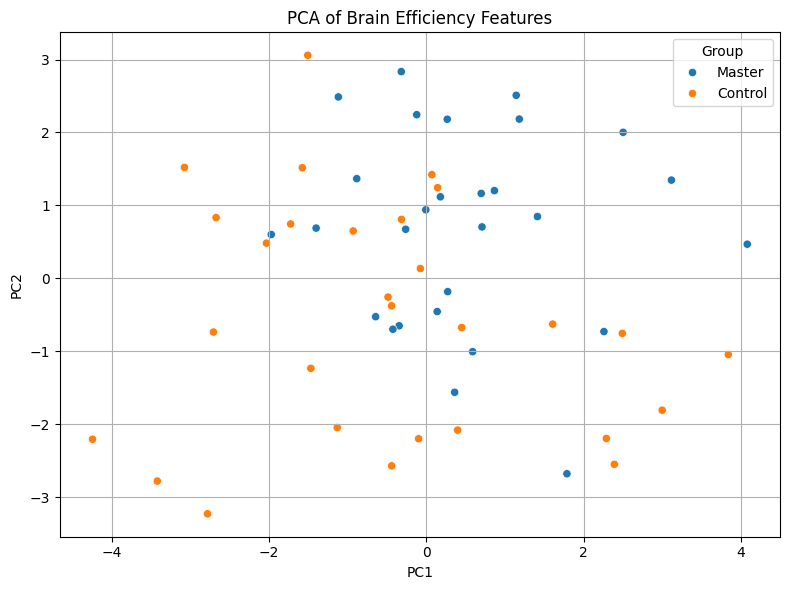

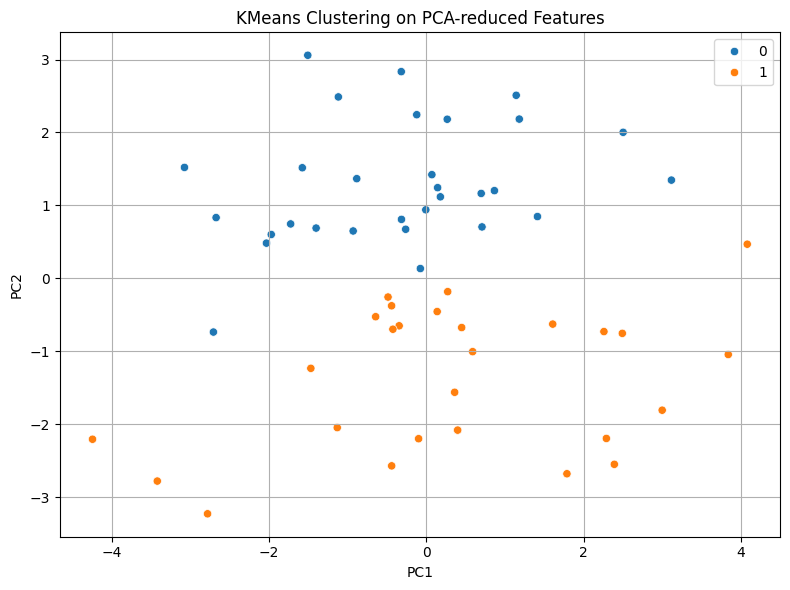

In [32]:
# Combine data
combined = pd.concat([masters.assign(Group=1), controls.assign(Group=0)])
X = combined[features]
y = combined["Group"]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y.map({1:'Master', 0:'Control'}))
plt.title("PCA of Brain Efficiency Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Compare clustering to true labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels)
plt.title("KMeans Clustering on PCA-reduced Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


# 📄 Summary of Findings

This study compared structural brain features between two groups, (chess masters and control subjects), using FreeSurfer-derived metrics from structural MRI scans. The analysis focused on regions associated with high-level cognition, including cortical thickness in the precuneus and superior frontal areas, and volumetric measures in the rostral middle frontal cortex.

The results revealed that chess masters exhibit significantly higher cortical thickness in both the left and right precuneus and superior frontal gyri, regions critical for spatial reasoning, executive control, and mental imagery. These findings align with existing neuroscience literature linking expert-level performance to enhanced structural specialization. While gray matter volume and other volumetric features showed slight increases in masters, these differences were not statistically significant. A PCA and clustering analysis further supported a partial separation between the groups, suggesting that cortical features alone may carry discriminative power for distinguishing expert cognition.


P.s.

I wanted to use the images to do analysis but found out that they are different shapes 4D to 3D.

The only thing that could be comparable to the emotional fMRI dataset is the rest data collected from the chess dataset.

I did run the commands to get the information, but when transfering the data to my laptop... It took until 10:30pm to finish.👀